In [1]:
from pathlib import Path
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2
net_path = Path('..')/'data'/'network_models_shared'
latex_path = Path('..')/'idetc19-latex'/'img'

In [2]:
def set_style():
    # This sets reasonable defaults for font size for a figure that will go in a paper
    sns.set_context("paper")
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    # Make the background white, and specify the specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })
set_style()

In [3]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

from lib.analysis import draw_G, all_thres, Record, compare_3

In [4]:
model='aircraft'
# model='drivetrain'
# model='bicycle'
struct = pd.read_excel(net_path/f'{model}_component_model.xlsx', index_col=0)

G = nx.from_pandas_adjacency(struct)
G = nx.convert_node_labels_to_integers(G, label_attribute='item')
pos = nx.layout.kamada_kawai_layout(G)

(375, 375) 97.5%


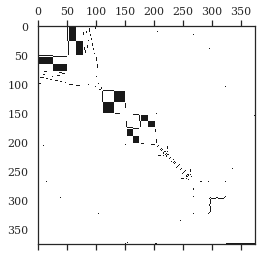

In [5]:
plt.spy(struct)
print(struct.shape, f'{1-struct.sum().sum()/struct.shape[0]**2:.1%}')

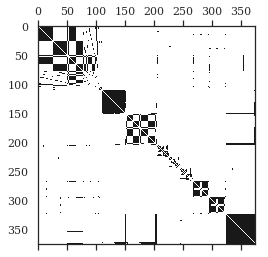

In [36]:
# sns.clustermap(struct)
# sns.clustermap(np.linalg.matrix_power(struct,3))

# np.savetxt('cosine-adj.txt', cos)
# np.savetxt('ivt-adj.txt', A_approx)
# np.savetxt('ivt-cos-fthres.txt', np.array([ts_ivt, ts_cos]))
A = struct.values

ts_ivt, ts_cos = np.loadtxt('ivt-cos-fthres.txt')

ivt = np.loadtxt('ivt-adj.txt')
ivt_thres = np.where(ivt>=ts_ivt, 1, 0)
cos = np.loadtxt('cosine-adj.txt')
cos_thres = np.where(cos>=ts_cos, 1, 0)



# cos_thres = np.load('cosine_adj.npy')
# ivt_thres = np.load('invite_adj.npy')

# walk2 = np.where(np.linalg.matrix_power(struct,2)>0,1,0)
walk2 = nx.to_numpy_array(nx.power(G, 2))
plt.spy(walk2)

In [37]:
from sklearn.metrics import f1_score
f1_score(A.flatten(), ivt_thres.flatten()), f1_score(A.flatten(), cos_thres.flatten())

(0.7546506518236414, 0.48945147679324896)

/home/tbsexton/anaconda3/envs/eng-net/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/tbsexton/anaconda3/envs/eng-net/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/tbsexton/anaconda3/envs/eng-net/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/tbsexton/anaconda3/envs/eng-net/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/tbsexton/anaconda3/envs/eng-net/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/tbsexton/anaconda3/envs/eng-net/lib/python3.7/sit

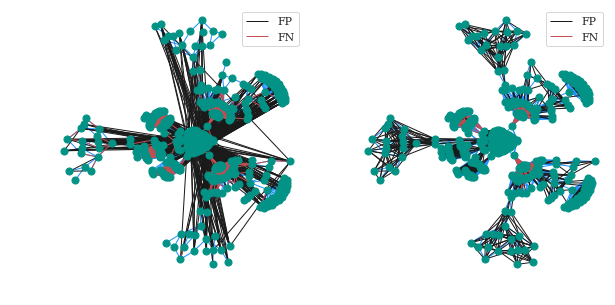

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(121)
in_ivt     = nx.from_numpy_array(ivt_thres - A > 0)
not_in_ivt = nx.from_numpy_array(A - ivt_thres > 0)
draw_G(G, pos, fp=in_ivt, fn=not_in_ivt, withlabels=False)

plt.subplot(122)
cos_thres = np.where(cos>=ts_cos, 1, 0)
in_cos     = nx.from_numpy_array(cos_thres - A > 0)
not_in_cos = nx.from_numpy_array(A - cos_thres > 0)

draw_G(G, pos, fp=in_cos, fn=not_in_cos)

In [39]:
# plt.figure(figsize=(10,10))
# draw_G(G, pos, 
#     fp=nx.from_numpy_array(walk2-struct.values >0 ),
#     fn=nx.from_numpy_array(struct.values-walk2 >0 ),
# )

/home/tbsexton/anaconda3/envs/eng-net/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/tbsexton/anaconda3/envs/eng-net/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/tbsexton/anaconda3/envs/eng-net/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/tbsexton/anaconda3/envs/eng-net/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/tbsexton/anaconda3/envs/eng-net/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/tbsexton/anaconda3/envs/eng-net/lib/python3.7/sit

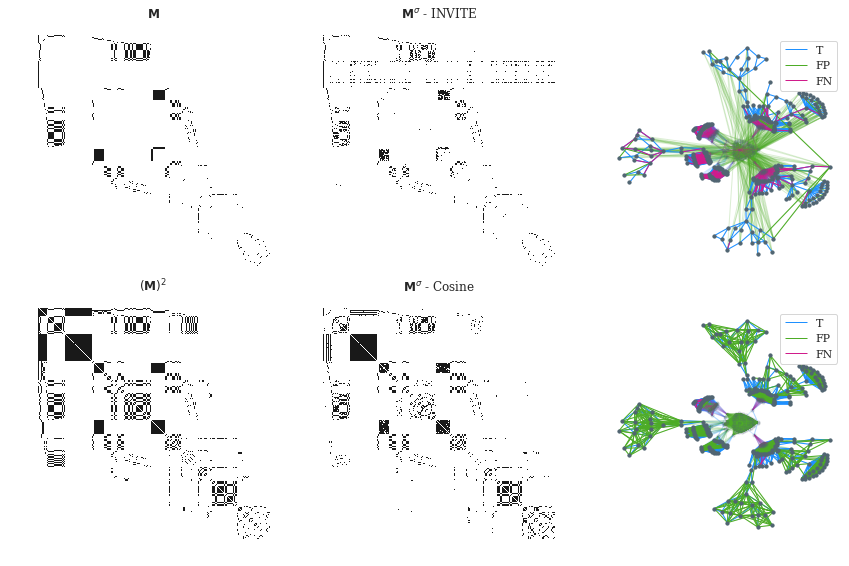

In [92]:
cent = pd.Series(nx.closeness_centrality(G))
order=(cent
    .sort_values(ascending=False)
    .index.tolist()
)
def sort_spy(A, order, ax=None, **kws):
    if ax is None:
        f = plt.figure()
        ax = plt.gca()
    a = A[order,:][:,order]
    
    ax.spy(a, **kws)

f,axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

for n,ax in enumerate(axes[:,:2].flatten()):
    sort_spy([
        A, 
        ivt_thres, 
        walk2, 
        cos_thres,
    ][n], order, ax=ax)
    ax.axis('off')
    ax.set_title([
        '$\mathbf{M}$',
        '$\mathbf{M}^{\sigma}$ - INVITE',
        '$(\mathbf{M})^2$',
        '$\mathbf{M}^{\sigma}$ - Cosine',
    ][n])

cut_order=(cent[cent<cent.quantile(.75)]
    .sort_values(ascending=False)
    .index.tolist()
)
# cut_rm=(cent[cent>=cent.quantile(.75)]
#     .sort_values(ascending=False)
#     .index.tolist()
# )
for n, ax in enumerate(axes[:,-1].flatten()):
    plt.sca(ax)
    draw_G(G, pos, **{
        0:dict(fp=in_ivt, fn=not_in_ivt),
        1:dict(fp=in_cos, fn=not_in_cos)
    }[n], alpha=.2, legend=False)
    draw_G(G.subgraph(cut_order), pos, **{
        0:dict(fp=in_ivt.subgraph(cut_order), fn=not_in_ivt.subgraph(cut_order)),
        1:dict(fp=in_cos.subgraph(cut_order), fn=not_in_cos.subgraph(cut_order))
    }[n])
    
plt.tight_layout()
plt.savefig(latex_path/'powergraph-compare.png', dpi=400)

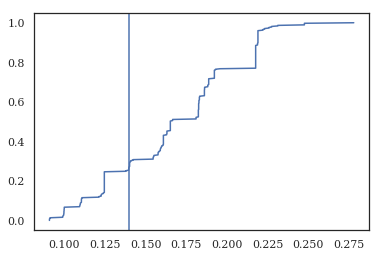

In [59]:
plt.plot(np.sort(cent), np.linspace(0,1,len(cent)))
plt.axvline(np.sort(cent)[100])

In [68]:
cent[cent<cent.quantile()]

78     0.159284
79     0.159284
80     0.155122
81     0.155122
82     0.159014
83     0.157739
84     0.159014
85     0.157739
86     0.154609
87     0.154609
88     0.158340
89     0.157606
90     0.159014
91     0.154865
92     0.154609
93     0.158340
94     0.157606
95     0.159014
96     0.154865
97     0.154609
98     0.157673
99     0.157673
104    0.139552
105    0.139552
106    0.121192
107    0.121192
108    0.137855
109    0.137855
151    0.163105
152    0.163105
         ...   
294    0.160722
295    0.162892
296    0.142259
297    0.124584
298    0.124584
299    0.124584
300    0.124584
301    0.124584
302    0.124584
303    0.124584
304    0.124584
305    0.124584
306    0.124584
307    0.140127
308    0.140127
309    0.140127
310    0.124584
311    0.124584
312    0.124584
313    0.124584
314    0.124584
315    0.124584
316    0.124584
317    0.124584
318    0.124584
319    0.124584
320    0.140127
321    0.140390
322    0.140866
323    0.140866
Length: 170, dtype: floa